## import libraries and functions

In [1]:
import pandas as pd                                   #data handling
import numpy as np                                    #data cleaning
import seaborn as sns                                 #plots
import matplotlib.pyplot as plt                       #plots
%matplotlib inline

from sklearn.preprocessing import LabelEncoder        #to standerdise data
le = LabelEncoder()

from sklearn.model_selection import train_test_split  #to split into training and testing sets
from sklearn.linear_model import LinearRegression
lm_pa = LinearRegression()



pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

def rm_out(df,col,k):
    mean=df[col].mean()
    global df1
    sd=df[col].std()
    final_list = [x for x in df[col] if (x > mean-k*sd and x < mean+k*sd)]
    df1 = df.loc[df[col].isin(final_list)]; print(df1.shape)
    print('Number of outliers removed-->',df.shape[0] - df1.shape[0])

### read file

In [2]:
pa = pd.read_csv(r'D:\imarticus\datasets\Property_Price_Train.csv')

### study the data

In [3]:
print(pa.shape)
pa.head()

(1459, 81)


,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,60,RLD,65.0,8450,Paved,NaN,Reg,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,SS,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PC,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,TF,0,NaN,Attchd,2003.0,RFn,2,1085.793744,TA,TA,Y,163.788080,69.596115,20.337934,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RLD,80.0,9600,Paved,NaN,Reg,Lvl,AllPub,FR2P,GS,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,SS,MetalSd,MetalSd,None,0.0,TA,TA,CB,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,TF,1,TA,Attchd,1976.0,RFn,2,196.316304,TA,TA,Y,198.900074,74.716033,15.039392,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RLD,68.0,11250,Paved,NaN,IR1,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,SS,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PC,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,TF,1,TA,Attchd,2001.0,RFn,2,218.068403,TA,TA,Y,26.127533,32.085268,-46.232198,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RLD,60.0,9550,Paved,NaN,IR1,Lvl,AllPub,C,GS,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,SS,Wd Sdng,Wd Shng,None,0.0,TA,TA,BT,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,TF,1,Gd,Detchd,1998.0,Unf,3,696.996439,TA,TA,Y,46.948018,40.181415,60.921821,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RLD,84.0,14260,Paved,NaN,IR1,Lvl,AllPub,FR2P,GS,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,SS,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PC,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,TF,1,TA,Attchd,2000.0,RFn,3,568.859882,TA,TA,Y,-10.626105,20.755323,21.788818,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### find out nulls 

In [4]:
pa.isnull().sum()

Id                              0
Building_Class                  0
Zoning_Class                    0
Lot_Extent                    259
Lot_Size                        0
Road_Type                       0
Lane_Type                    1368
Property_Shape                  0
Land_Outline                    0
Utility_Type                    0
Lot_Configuration               0
Property_Slope                  0
Neighborhood                    0
Condition1                      0
Condition2                      0
House_Type                      0
House_Design                    0
Overall_Material                0
House_Condition                 0
Construction_Year               0
Remodel_Year                    0
Roof_Design                     0
Roof_Quality                    0
Exterior1st                     0
Exterior2nd                     0
Brick_Veneer_Type               8
Brick_Veneer_Area               8
Exterior_Material               0
Exterior_Condition              0
Foundation_Typ

In [5]:
pa.isnull().sum() *100 / pa.shape[0]

Id                            0.000000
Building_Class                0.000000
Zoning_Class                  0.000000
Lot_Extent                   17.751885
Lot_Size                      0.000000
Road_Type                     0.000000
Lane_Type                    93.762851
Property_Shape                0.000000
Land_Outline                  0.000000
Utility_Type                  0.000000
Lot_Configuration             0.000000
Property_Slope                0.000000
Neighborhood                  0.000000
Condition1                    0.000000
Condition2                    0.000000
House_Type                    0.000000
House_Design                  0.000000
Overall_Material              0.000000
House_Condition               0.000000
Construction_Year             0.000000
Remodel_Year                  0.000000
Roof_Design                   0.000000
Roof_Quality                  0.000000
Exterior1st                   0.000000
Exterior2nd                   0.000000
Brick_Veneer_Type        

In [6]:
pa.columns[pa.isnull().sum() *100 / pa.shape[0] >40] # huge % of nulls to be dropped

Index(['Lane_Type', 'Fireplace_Quality', 'Pool_Quality', 'Fence_Quality',
       'Miscellaneous_Feature'],
      dtype='object')

In [7]:
pa.shape

(1459, 81)

### handle nulls

In [8]:
pa1 = pa.drop(['Lane_Type', 'Fireplace_Quality', 'Pool_Quality', 'Fence_Quality',
       'Miscellaneous_Feature','Id'],axis =1)

In [9]:
print(pa1.shape)
pa1.isnull().sum()

(1459, 75)


Building_Class                 0
Zoning_Class                   0
Lot_Extent                   259
Lot_Size                       0
Road_Type                      0
Property_Shape                 0
Land_Outline                   0
Utility_Type                   0
Lot_Configuration              0
Property_Slope                 0
Neighborhood                   0
Condition1                     0
Condition2                     0
House_Type                     0
House_Design                   0
Overall_Material               0
House_Condition                0
Construction_Year              0
Remodel_Year                   0
Roof_Design                    0
Roof_Quality                   0
Exterior1st                    0
Exterior2nd                    0
Brick_Veneer_Type              8
Brick_Veneer_Area              8
Exterior_Material              0
Exterior_Condition             0
Foundation_Type                0
Basement_Height               37
Basement_Condition            37
Exposure_L

In [10]:
pa1.Lot_Extent         = pa1.Lot_Extent.fillna(pa1.Lot_Extent.mean())
pa1.Basement_Height      = pa1.Basement_Height.fillna('TA')
pa1.Basement_Condition     = pa1.Basement_Condition.fillna('TA')
pa1.Exposure_Level       = pa1.Exposure_Level.fillna("No")
pa1.BsmtFinType2       = pa1.BsmtFinType2.fillna('Unf')
pa1.Electrical_System     = pa1.Electrical_System.fillna('SBrkr')
pa1.Garage             = pa1.Garage.fillna('Attchd')
pa1.BsmtFinType1        = pa1.BsmtFinType1.fillna('Unf')
pa1.Garage_Built_Year    = pa1.Garage_Built_Year.fillna(pa1.Garage_Built_Year.mean())
pa1.Garage_Finish_Year    = pa1.Garage_Finish_Year.fillna('Unf')
pa1.Garage_Quality      = pa1.Garage_Quality.fillna('TA')
pa1.Garage_Condition    = pa1.Garage_Condition.fillna('TA')
pa1.Brick_Veneer_Type    = pa1.Brick_Veneer_Type.fillna('None')
pa1.Brick_Veneer_Area    = pa1.Brick_Veneer_Area.fillna(pa1.Brick_Veneer_Area.mean())


pa1.isnull().sum()

Building_Class               0
Zoning_Class                 0
Lot_Extent                   0
Lot_Size                     0
Road_Type                    0
Property_Shape               0
Land_Outline                 0
Utility_Type                 0
Lot_Configuration            0
Property_Slope               0
Neighborhood                 0
Condition1                   0
Condition2                   0
House_Type                   0
House_Design                 0
Overall_Material             0
House_Condition              0
Construction_Year            0
Remodel_Year                 0
Roof_Design                  0
Roof_Quality                 0
Exterior1st                  0
Exterior2nd                  0
Brick_Veneer_Type            0
Brick_Veneer_Area            0
Exterior_Material            0
Exterior_Condition           0
Foundation_Type              0
Basement_Height              0
Basement_Condition           0
Exposure_Level               0
BsmtFinType1                 0
BsmtFinS

## standerdize data

In [11]:
pa1[   pa1.select_dtypes(include=['object']).columns     ]   = pa1[   pa1.select_dtypes(include=['object']).columns     ].apply(le.fit_transform)


### data sampling

In [12]:
pa1_train , pa1_test = train_test_split(pa1, test_size = .2 , random_state = 555)
print(pa1_train.shape)
print(pa1_test.shape)

(1167, 75)
(292, 75)


In [13]:
pa1_train_x  = pa1_train.iloc[:,0:-1]
pa1_train_y  = pa1_train.iloc[:,-1]

pa1_test_x   = pa1_test.iloc[:,0:-1]
pa1_test_y   = pa1_test.iloc[:,-1]

# model 

In [14]:
lm_pa.fit(pa1_train_x,pa1_train_y)

LinearRegression()

### performance metrics

In [15]:
print(lm_pa.intercept_)
print(lm_pa.coef_)


1860467.002488514
[-1.20070634e+02 -1.63635082e+03 -1.02469892e+02  4.77564164e-01
  4.47551554e+04 -5.72123648e+02  1.68699932e+03 -4.72091141e+04
 -5.65979809e+01  7.36352773e+03  2.15248456e+02 -3.73043932e+02
 -4.69676536e+02 -2.89531420e+03 -1.24136748e+03  1.04226620e+04
  5.12776748e+03  2.42165309e+02  4.94848788e+01  1.67120739e+03
  3.01705598e+04 -9.10300704e+02  5.46194952e+01  5.23024174e+03
  4.32435686e+01 -1.10465599e+04  2.37363311e+02  8.72873470e+02
 -9.50923267e+03  2.40242162e+03 -3.62266231e+03 -9.58585543e+02
  4.30938331e+00  1.64583784e+03  1.47439258e+01 -6.95175964e+00
  1.21015495e+01 -2.12416064e+03 -7.23565052e+02  6.84724042e+02
 -6.95099999e+02  1.88284766e+01  2.49367911e+01 -1.50227087e+01
  2.87425589e+01  4.12043454e+03 -7.75848854e+02  4.46845942e+03
 -4.05699802e+03 -4.58943678e+03 -7.72052805e+03 -7.81050130e+03
  2.37596595e+03  2.19934886e+03  4.56878700e+03  1.20539158e+02
 -8.06887065e+00  5.31294736e+02  8.96361772e+03  2.19212065e-01
  1.638

In [16]:
list(lm_pa.coef_)

[-120.0706336867006,
 -1636.3508184555258,
 -102.46989157181638,
 0.47756416407043645,
 44755.15539054926,
 -572.1236475031341,
 1686.9993165697367,
 -47209.114132652896,
 -56.59798093572587,
 7363.527728288548,
 215.24845562982878,
 -373.0439324015055,
 -469.6765361023432,
 -2895.314196807718,
 -1241.3674788344208,
 10422.661957039902,
 5127.767477470492,
 242.16530921152935,
 49.48487878191224,
 1671.2073946149742,
 30170.559808676484,
 -910.3007040180662,
 54.61949522106636,
 5230.241740120921,
 43.24356855725637,
 -11046.559859985184,
 237.36331080003643,
 872.8734699130109,
 -9509.232673330069,
 2402.421621288352,
 -3622.6623105631365,
 -958.5855425914009,
 4.309383306254858,
 1645.8378402597323,
 14.743925813617352,
 -6.951759640600358,
 12.101549496821917,
 -2124.1606444144786,
 -723.565051673268,
 684.7240420255694,
 -695.0999986213284,
 18.82847656157901,
 24.936791065279976,
 -15.022708738862548,
 28.742558871148503,
 4120.434536139794,
 -775.8488539785245,
 4468.459418004335

### observing features

In [17]:
feature_beta =pd.DataFrame({ ' Features' : pa1_train_x.columns , 'Slope' : lm_pa.coef_})
print(feature_beta)

                     Features         Slope
0              Building_Class   -120.070634
1                Zoning_Class  -1636.350818
2                  Lot_Extent   -102.469892
3                    Lot_Size      0.477564
4                   Road_Type  44755.155391
5              Property_Shape   -572.123648
6                Land_Outline   1686.999317
7                Utility_Type -47209.114133
8           Lot_Configuration    -56.597981
9              Property_Slope   7363.527728
10               Neighborhood    215.248456
11                 Condition1   -373.043932
12                 Condition2   -469.676536
13                 House_Type  -2895.314197
14               House_Design  -1241.367479
15           Overall_Material  10422.661957
16            House_Condition   5127.767477
17          Construction_Year    242.165309
18               Remodel_Year     49.484879
19                Roof_Design   1671.207395
20               Roof_Quality  30170.559809
21                Exterior1st   

In [18]:
feature_beta.sort_values('Slope' , ascending = False) 

,Features,Slope
4,Road_Type,44755.155391
20,Roof_Quality,30170.559809
15,Overall_Material,10422.661957
58,Garage_Size,8963.617720
9,Property_Slope,7363.527728
23,Brick_Veneer_Type,5230.241740
16,House_Condition,5127.767477
54,Fireplaces,4568.786998
47,Full_Bathroom_Above_Grade,4468.459418
45,Underground_Full_Bathroom,4120.434536


### R square and Adjecent R square

In [19]:
Rsquare = lm_pa.score(pa1_train_x , pa1_train_y)

N = pa1_train_x.shape[0]
K = pa1_train_x.shape[1]

AdjRsquare = 1 - (1-Rsquare) * (N -1)/(N-K-1)

print('Rsquare-->',Rsquare)
print('AdjRsquare-->',AdjRsquare)


Rsquare--> 0.8657959918364976
AdjRsquare--> 0.856701581026883


### prediction

In [20]:
pred_train_pa = lm_pa.predict(pa1_train_x)
pred_test_pa  = lm_pa.predict(pa1_test_x)


### performance metrix

In [21]:
error_train_pa = pa1_train_y - pred_train_pa
error_test_pa = pa1_test_y - pred_test_pa

mse_test = np.mean(np.square(error_test_pa))
rmse_test = np.sqrt(mse_test)
mape_test = np.mean(np.abs(error_test_pa*100/pa1_test_y))
Accuracy = 100- mape_test

print("MSE-->",mse_test)
print("RMSE-->",rmse_test)
print("MAPE-->",mape_test)
print('Accuracy-->',Accuracy)

MSE--> 1156205771.0897722
RMSE--> 34003.02591078877
MAPE--> 11.02006110595657
Accuracy--> 88.97993889404343


### check the assumptions

In [22]:
print('Error in Train-->',np.mean(error_train_pa))

Error in Train--> 4.169803301084726e-11


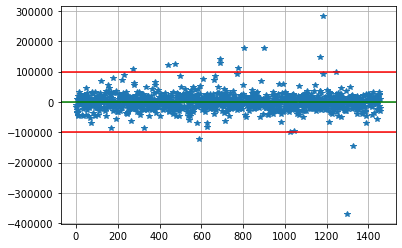

In [23]:
plt.plot(error_train_pa,'*')
plt.axhline(y= 100000,color="r")
plt.axhline(y= -100000,color="r")
plt.axhline(y= error_train_pa.mean(),color="g")
plt.grid()

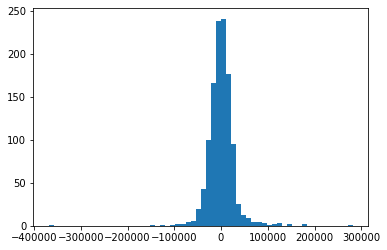

In [24]:
plt.hist(error_train_pa,bins = 60);

C:\Users\danga\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


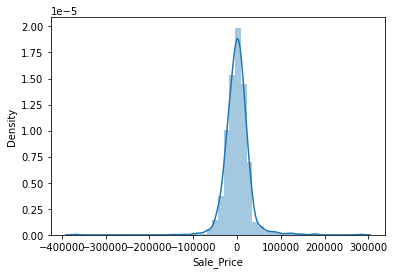

In [25]:
sns.distplot(error_train_pa);

In [26]:
pred_actual = pd.DataFrame({"Predicted" : pred_train_pa, "Actual": pa1_train_y})

<Figure size 1080x1080 with 0 Axes>

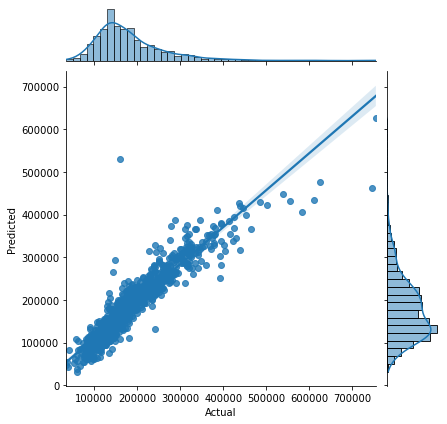

In [27]:
plt.figure(figsize=(15,15))
sns.jointplot(x='Actual',y='Predicted',data=pred_actual,kind='reg');

## remove outliers

In [28]:
rm_out(pa1,'Sale_Price',2)
pa1 = df1

(1396, 75)
Number of outliers removed--> 63


## removed the outliers build the model again.

##### from sampling repeate every step

In [29]:
# sampling

pa1_train , pa1_test = train_test_split(pa1, test_size = .2 , random_state = 555)
print(pa1_train.shape)
print(pa1_test.shape)

# spliting

pa1_train_x  = pa1_train.iloc[:,0:-1]
pa1_train_y  = pa1_train.iloc[:,-1]

pa1_test_x   = pa1_test.iloc[:,0:-1]
pa1_test_y   = pa1_test.iloc[:,-1]

# model
lm_pa.fit(pa1_train_x,pa1_train_y)

# performance metrics
#print('intercept',lm_pa.intercept_)
#print('coefficient',lm_pa.coef_)
#list(lm_pa.coef_)

# observing features
feature_beta =pd.DataFrame({ ' Features' : pa1_train_x.columns , 'Slope' : lm_pa.coef_})
#print(feature_beta)
 
#print(feature_beta.sort_values('Slope' , ascending = False))

# R square and Adjecent R square

Rsquare = lm_pa.score(pa1_train_x , pa1_train_y)

N = pa1_train_x.shape[0]
K = pa1_train_x.shape[1]

AdjRsquare = 1 - (1-Rsquare) * (N -1)/(N-K-1)

print('Rsquare-->',Rsquare)
print('AdjRsquare-->',AdjRsquare)

# predictions
pred_train_pa = lm_pa.predict(pa1_train_x)
pred_test_pa  = lm_pa.predict(pa1_test_x)

# performance metrics
error_train_pa = pa1_train_y - pred_train_pa
error_test_pa = pa1_test_y - pred_test_pa

mse_test = np.mean(np.square(error_test_pa))
rmse_test = np.sqrt(mse_test)
mape_test = np.mean(np.abs(error_test_pa*100/pa1_test_y))
Accuracy = 100- mape_test

print("MSE-->",mse_test)
print("RMSE-->",rmse_test)
print("MAPE-->",mape_test)
print('Accuracy-->',Accuracy)




(1116, 75)
(280, 75)
Rsquare--> 0.8581877295501856
AdjRsquare--> 0.8481069341483737
MSE--> 526517459.9732377
RMSE--> 22945.96827273231
MAPE--> 10.958320739693637
Accuracy--> 89.04167926030637


### checking assumptions

Error in Train--> -1.640089513820773e-10


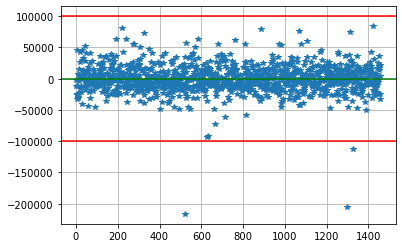

In [30]:

print('Error in Train-->',np.mean(error_train_pa))

# 1
plt.plot(error_train_pa,'*')
plt.axhline(y= 100000,color="r")
plt.axhline(y= -100000,color="r")
plt.axhline(y= error_train_pa.mean(),color="g")
plt.grid()



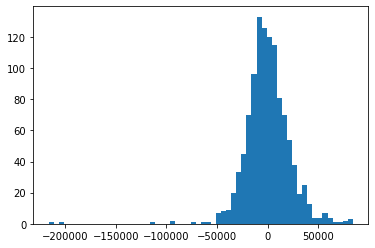

In [31]:
# 2
plt.hist(error_train_pa,bins = 60);



C:\Users\danga\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


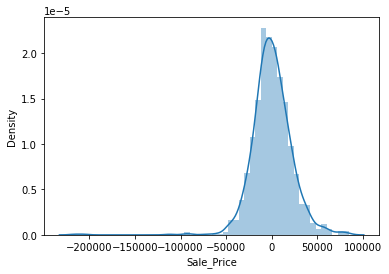

In [32]:
# 3
sns.distplot(error_train_pa);



<Figure size 1080x1080 with 0 Axes>

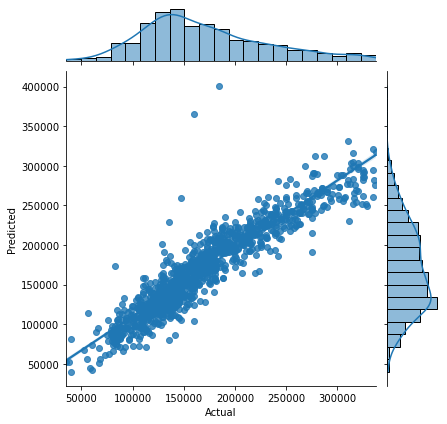

In [33]:
# 4
pred_actual = pd.DataFrame({"Predicted" : pred_train_pa, "Actual": pa1_train_y})
plt.figure(figsize=(15,15))
sns.jointplot(x='Actual',y='Predicted',data=pred_actual,kind='reg');

## repeate the steps to improve model

                     Features         Slope
4                   Road_Type  30378.689175
20               Roof_Quality  17084.275645
9              Property_Slope  16703.183413
15           Overall_Material  11350.070135
58                Garage_Size  10555.895786
45  Underground_Full_Bathroom   8978.946951
54                 Fireplaces   8274.371833
16            House_Condition   5411.062828
6                Land_Outline   3981.920915
47  Full_Bathroom_Above_Grade   3135.271955
52          Rooms_Above_Grade   2987.351483
27            Foundation_Type   2317.433938
73             Sale_Condition   2167.160632
53            Functional_Rate   1667.375661
33               BsmtFinType2   1595.594872
19                Roof_Design   1084.994863
29         Basement_Condition   1026.941085
26         Exterior_Condition    898.468063
61           Garage_Condition    858.375784
62               Pavedd_Drive    832.795486
39           Air_Conditioning    829.117397
49        Bedroom_Above_Grade   

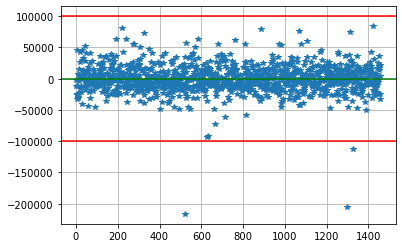

<Figure size 1080x1080 with 0 Axes>

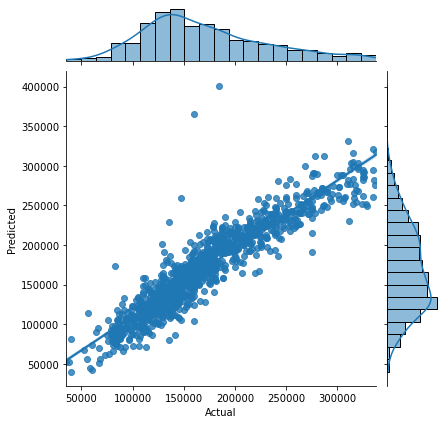

In [34]:
Df = pa1      # insert your dataframe name between <--->.

# issential imports for splitting data 
from sklearn.model_selection import train_test_split 

train , test = train_test_split(Df, test_size = .2 , random_state = 555)

train_x  = train.iloc[:,0:-1]  # select columns with (x) independent variables
train_y  = train.iloc[:,-1]    # select column  with (y) dependent variable

test_x   = test.iloc[:,0:-1]   # select columns with (x) independent variables
test_y   = test.iloc[:,-1]     # select column  with (y) dependent variable

# issential import for model building
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()


# model fitting
lin_reg.fit(train_x,train_y)

# observing features

feature_beta =pd.DataFrame({ ' Features' : train_x.columns , 'Slope' : lin_reg.coef_}) 
print(feature_beta.sort_values('Slope' , ascending = False))

# R square and Adjecent R square

Rsquare = lin_reg.score(train_x , train_y)

N = train_x.shape[0]
K = train_x.shape[1]

AdjRsquare = 1 - (1-Rsquare) * (N -1)/(N-K-1)

print('Rsquare-->',Rsquare)
print('AdjRsquare-->',AdjRsquare)

# predictions
pred_train = lin_reg.predict(train_x)
pred_test  = lin_reg.predict(test_x)

# performance metrics
error_train = train_y - pred_train
error_test  = test_y - pred_test

mse_test   = np.mean(np.square(error_test))
mse_train  = np.mean(np.square(error_train))
rmse_test  = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)
mape_test  = np.mean(np.abs(error_test*100/test_y))
mape_train = np.mean(np.abs(error_train*100/train_y))
Accuracy   = 100- mape_test

# 


print("MSE on test-->",mse_test)
print("MSE on train-->",mse_train)
print("RMSE on test-->",rmse_test)
print("RMSE on train-->",rmse_train)
print("MAPE on test-->",mape_test)
print("MAPE on train-->",mape_train)
print('Accuracy of Model-->',Accuracy)



# 1
print('Error in Train-->',np.mean(error_train))

plt.plot(error_train,'*')
plt.axhline(y= 100000,color="r")
plt.axhline(y= -100000,color="r")
plt.axhline(y= error_train.mean(),color="g")
plt.grid()

# 2
print('plotting the model predictions')

pred_actual = pd.DataFrame({"Predicted" : pred_train, "Actual": train_y})
plt.figure(figsize=(15,15))
sns.jointplot(x='Actual',y='Predicted',data=pred_actual,kind='reg');

# tring the lasso and ridge regressions

                     Features         Slope
4                   Road_Type  30089.744420
20               Roof_Quality  17074.643682
9              Property_Slope  16677.277434
15           Overall_Material  11353.536252
58                Garage_Size  10550.618200
45  Underground_Full_Bathroom   8971.657073
54                 Fireplaces   8274.132947
16            House_Condition   5410.305797
6                Land_Outline   3978.845146
47  Full_Bathroom_Above_Grade   3128.348551
52          Rooms_Above_Grade   2982.287419
27            Foundation_Type   2314.581794
73             Sale_Condition   2167.646894
53            Functional_Rate   1665.345121
33               BsmtFinType2   1590.323685
19                Roof_Design   1085.434704
29         Basement_Condition   1023.482127
26         Exterior_Condition    896.072628
61           Garage_Condition    847.390478
62               Pavedd_Drive    829.336186
39           Air_Conditioning    816.596656
49        Bedroom_Above_Grade   

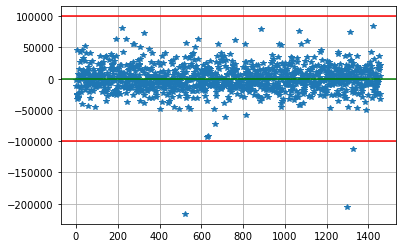

<Figure size 1080x1080 with 0 Axes>

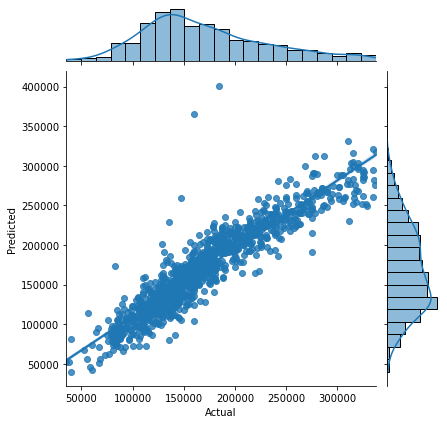

In [36]:
Df = pa1      # insert your dataframe name between <--->.

# issential imports for splitting data 
from sklearn.model_selection import train_test_split 

train , test = train_test_split(Df, test_size = .2 , random_state = 555)

train_x  = train.iloc[:,0:-1]  # select columns with (x) independent variables
train_y  = train.iloc[:,-1]    # select column  with (y) dependent variable

test_x   = test.iloc[:,0:-1]   # select columns with (x) independent variables
test_y   = test.iloc[:,-1]     # select column  with (y) dependent variable

# issential import for model building
from sklearn.linear_model import Lasso
las_reg  = Lasso()


# model fitting
las_reg.fit(train_x,train_y)

# observing features

feature_beta =pd.DataFrame({ ' Features' : train_x.columns , 'Slope' : las_reg.coef_}) 
print(feature_beta.sort_values('Slope' , ascending = False))

# R square and Adjecent R square

Rsquare = las_reg.score(train_x , train_y)

N = train_x.shape[0]
K = train_x.shape[1]

AdjRsquare = 1 - (1-Rsquare) * (N -1)/(N-K-1)

print('Rsquare-->',Rsquare)
print('AdjRsquare-->',AdjRsquare)

# predictions
pred_train = las_reg.predict(train_x)
pred_test  = las_reg.predict(test_x)

# performance metrics
error_train = train_y - pred_train
error_test  = test_y - pred_test

mse_test   = np.mean(np.square(error_test))
mse_train  = np.mean(np.square(error_train))
rmse_test  = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)
mape_test  = np.mean(np.abs(error_test*100/test_y))
mape_train = np.mean(np.abs(error_train*100/train_y))
Accuracy   = 100- mape_test

print("MSE on test-->",mse_test)
print("MSE on train-->",mse_train)
print("RMSE on test-->",rmse_test)
print("RMSE on train-->",rmse_train)
print("MAPE on test-->",mape_test)
print("MAPE on train-->",mape_train)
print('Accuracy-->',Accuracy)

# 1
print('Error in Train-->',np.mean(error_train))

plt.plot(error_train,'*')
plt.axhline(y= 100000,color="r")
plt.axhline(y= -100000,color="r")
plt.axhline(y= error_train.mean(),color="g")
plt.grid()

# 2
print('plotting the model predictions')

pred_actual = pd.DataFrame({"Predicted" : pred_train, "Actual": train_y})
plt.figure(figsize=(15,15))
sns.jointplot(x='Actual',y='Predicted',data=pred_actual,kind='reg');

# ridge

                     Features         Slope
4                   Road_Type  24302.133228
20               Roof_Quality  16921.853191
9              Property_Slope  16345.111864
15           Overall_Material  11371.542019
58                Garage_Size  10485.610645
45  Underground_Full_Bathroom   8890.175383
54                 Fireplaces   8274.250649
16            House_Condition   5405.888782
6                Land_Outline   3993.380614
47  Full_Bathroom_Above_Grade   3141.567058
52          Rooms_Above_Grade   2929.761151
27            Foundation_Type   2338.291761
73             Sale_Condition   2178.888514
53            Functional_Rate   1647.491793
33               BsmtFinType2   1583.939807
19                Roof_Design   1121.074176
29         Basement_Condition    989.262588
39           Air_Conditioning    924.362849
26         Exterior_Condition    892.731692
62               Pavedd_Drive    848.474095
61           Garage_Condition    804.746639
49        Bedroom_Above_Grade   

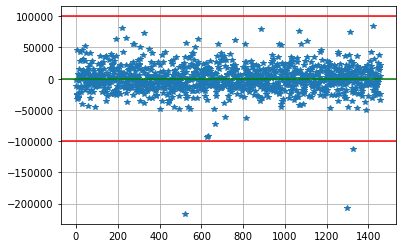

<Figure size 1080x1080 with 0 Axes>

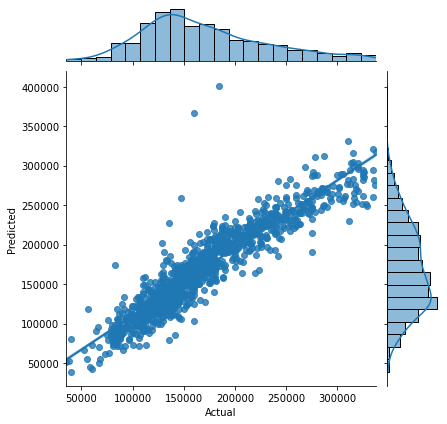

In [37]:
Df = pa1      # insert your dataframe name between <--->.

# issential imports for splitting data 
from sklearn.model_selection import train_test_split 

train , test = train_test_split(Df, test_size = .2 , random_state = 555)

train_x  = train.iloc[:,0:-1]  # select columns with (x) independent variables
train_y  = train.iloc[:,-1]    # select column  with (y) dependent variable

test_x   = test.iloc[:,0:-1]   # select columns with (x) independent variables
test_y   = test.iloc[:,-1]     # select column  with (y) dependent variable

# issential import for model building
from sklearn.linear_model import Ridge
rid_reg  = Ridge()


# model fitting
rid_reg.fit(train_x,train_y)

# observing features

feature_beta =pd.DataFrame({ ' Features' : train_x.columns , 'Slope' : rid_reg.coef_}) 
print(feature_beta.sort_values('Slope' , ascending = False))

# R square and Adjecent R square

Rsquare = rid_reg.score(train_x , train_y)

N = train_x.shape[0]
K = train_x.shape[1]

AdjRsquare = 1 - (1-Rsquare) * (N -1)/(N-K-1)

print('Rsquare-->',Rsquare)
print('AdjRsquare-->',AdjRsquare)

# predictions
pred_train = rid_reg.predict(train_x)
pred_test  = rid_reg.predict(test_x)

# performance metrics
error_train = train_y - pred_train
error_test  = test_y - pred_test

mse_test   = np.mean(np.square(error_test))
mse_train  = np.mean(np.square(error_train))
rmse_test  = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)
mape_test  = np.mean(np.abs(error_test*100/test_y))
mape_train = np.mean(np.abs(error_train*100/train_y))
Accuracy   = 100- mape_test

print("MSE on test-->",mse_test)
print("MSE on train-->",mse_train)
print("RMSE on test-->",rmse_test)
print("RMSE on train-->",rmse_train)
print("MAPE on test-->",mape_test)
print("MAPE on train-->",mape_train)
print('Accuracy-->',Accuracy)


# 1
print('Error in Train-->',np.mean(error_train))

plt.plot(error_train,'*')
plt.axhline(y= 100000,color="r")
plt.axhline(y= -100000,color="r")
plt.axhline(y= error_train.mean(),color="g")
plt.grid()

# 2
print('plotting the model predictions')

pred_actual = pd.DataFrame({"Predicted" : pred_train, "Actual": train_y})
plt.figure(figsize=(15,15))
sns.jointplot(x='Actual',y='Predicted',data=pred_actual,kind='reg');